In [1]:
df = pd.read_csv("linear-bcell-epitopes.csv")

In [2]:
# make sure all lengths match when sequence is present
# and all mismatching lengths are because sequence is missing
print(
    df[df["Length"] == df["Sequence_length"]]["Sequence"].isnull().mean(),
    df[df["Length"] != df["Sequence_length"]]["Sequence"].isnull().mean())
    

0.0 1.0


In [5]:
df.Virus.value_counts()

SARS-CoV-2    106
SARS           35
Name: Virus, dtype: int64

In [6]:
df_sars2 = df[df.Virus == "SARS-CoV-2"]
df_sars2.Source.value_counts()

Dahlke 2020     37
Charite 2020    37
Wang 2020       21
ReScan           9
Poh 2020         2
Name: Source, dtype: int64

In [7]:

df_sars2.Protein.value_counts()

S        58
N        36
M        11
ORF3a     1
Name: Protein, dtype: int64

In [8]:
df_sars2_S = df_sars2[df_sars2.Protein == "S"]
df_sars2_S.Source.value_counts()

Dahlke 2020     24
Charite 2020    20
Wang 2020        8
ReScan           4
Poh 2020         2
Name: Source, dtype: int64

In [9]:
ls ../Figures/COVID

AA_mafft_df_entropy.txt*
AA_sequence.txt*
AA_sequence_combined.txt*
COVID_combined_entropy_rank_filtered.csv*
COVID_human_MARIA.txt*
COVID_human_netMHCIIpan_rank_filtered.txt*
COVID_human_netMHCpan_rank_filtered.txt*
COVID_murine_NetMHCIIpan_unfilt.xls
COVID_murine_NetMHCpan_unfilt.xls
HLA_freq.txt*
NetMHC_pan_out_rank/
NetMHCpan_out_filt/
PEPperPRINT_IgA.txt*
PEPperPRINT_IgA_DESeq2.txt*
PEPperPRINT_IgG.txt*
PEPperPRINT_IgG_DESeq2.txt*
PEPperPRINT_peptide_key.txt*
PEPperPRINT_sample_info.txt*
Supplemental/
Table_1.txt*
Translation_coords.txt*
ent_vs_prop.txt*
entropy_7882.txt*
filtered_cast_sars-cov-2.mhcflurry_predictions.csv*


Text(0.2, 0.2, 'A')

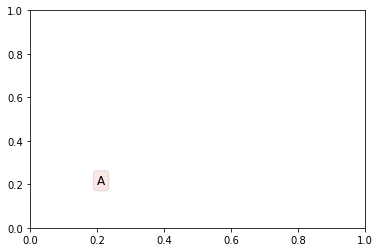

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.text(
    0.2, 0.2, "A", 
    backgroundcolor=(0.9, 0.1, 0.1, 0.1), 
    family='DejaVu Sans', 
    size=12, 
    fontweight=300,
    bbox=dict(boxstyle='round', facecolor=(0.9, 0.1, 0.1), alpha=0.1))

In [11]:
def parse_fasta(filename):
    result = {}
    with open(filename) as f:
        current_id = None
        lines = []
        for l in f:
            l = l.strip()
            if not l:
                continue
            elif l.startswith(">"):
                if current_id:
                    result[current_id] = "".join(lines)
                current_id = l[1:].split("|")[0]
                lines = []
            else:
                lines.append(l)
        if current_id:
            result[current_id] = "".join(lines)
        return result

proteome = parse_fasta("../Figures/COVID/AA_sequence.txt")


In [12]:
len(proteome["S"])

1273

In [13]:
S = proteome["S"]

Text(0.5, 0, 'Amino acid sequence of spike glycoprotein')

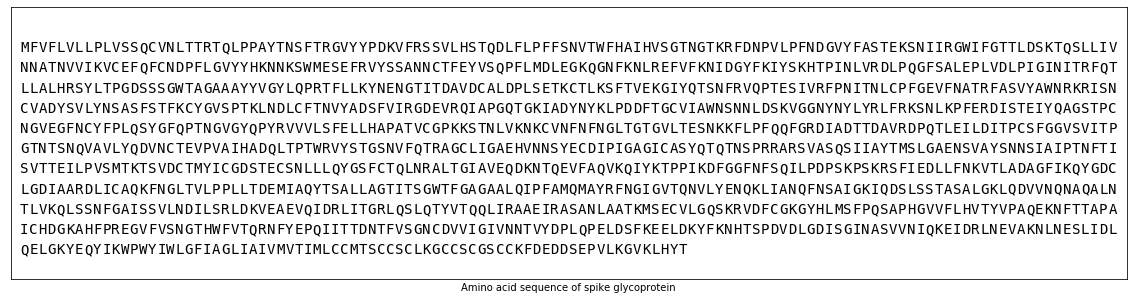

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt

S = proteome["S"]

fig = plt.figure(figsize=(20,5))
plt.xticks([])
plt.yticks([])

letters_per_line = 120
num_lines = len(S) // letters_per_line + 1
for i, letter in enumerate(S):
    line = i // letters_per_line
    x = (i % letters_per_line) / letters_per_line
    x_padded = (letters_per_line - 2) / letters_per_line * x + (1 / letters_per_line)
    y = 1.0 - (line + 1) / num_lines
    y_padded = y * (num_lines - 2) / num_lines + (1 / num_lines)
    plt.text(
        x=x_padded, 
        y=y_padded, 
        s=letter, 
        family='monospace', 
        size=14, 
        fontweight=300,
        bbox=dict(boxstyle='round', facecolor=(0.9, 0.1, 0.1), alpha=0.0))
plt.xlabel("Amino acid sequence of spike glycoprotein")

In [15]:
ls ../glycosylation/

glycosites-Watanabe.txt


Text(0.5, 0, 'Amino acid sequence of spike glycoprotein with D614 mutation highlighted')

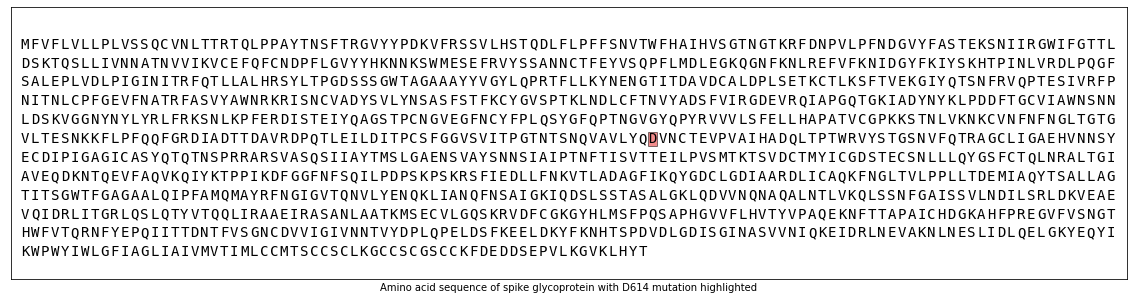

In [16]:

S = proteome["S"]

fig = plt.figure(figsize=(20,5))
plt.xticks([])
plt.yticks([])

letters_per_line = 110
num_lines = len(S) // letters_per_line + 1
for i, letter in enumerate(S):
    aa_num = i + 1
    line = i // letters_per_line
    x = (i % letters_per_line) / letters_per_line
    x_padded = (letters_per_line - 2) / letters_per_line * x + (1 / letters_per_line)
    y = 1.0 - (line + 1) / num_lines
    y_padded = y * (num_lines - 2) / num_lines + (1 / num_lines)
    alpha = 0.5 if aa_num == 614 else 0.0
    plt.text(
        x=x_padded, 
        y=y_padded, 
        s=letter, 
        family='monospace', 
        # backgroundcolor=(0.9, 0.1, 0.1, alpha),
        size=14, 
        fontweight=300,
        bbox=dict(boxstyle='square,pad=0', facecolor=(0.9, 0.1, 0.1), alpha=alpha))
plt.xlabel("Amino acid sequence of spike glycoprotein with D614 mutation highlighted")

Text(0.5, 0, 'Amino acid sequence of spike glycoprotein with D614 mutation and glycosites highlighted')

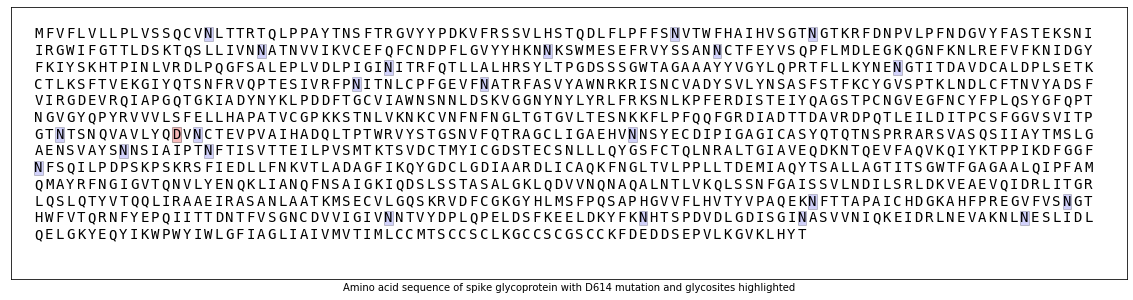

In [17]:

glycosites = set([])
with open("../glycosylation/glycosites-Watanabe.txt") as f:
    for l in f:
        l = l.strip()
        if l.startswith("#"):
            continue
        if not l:
            continue
        glycosites.add(int(l))

polymorphic_sites = {614}
S = proteome["S"]

fig = plt.figure(figsize=(20,5))
plt.xticks([])
plt.yticks([])

letters_per_line = 100
num_lines = len(S) // letters_per_line + 1
x_padding_percent = .05
y_padding_percent = .2

for i, letter in enumerate(S):
    aa_num = i + 1
    line = i // letters_per_line
    col = (i % letters_per_line)
    x =  col / letters_per_line
    
    x_padded = x * (1.0 - x_padding_percent)  + x_padding_percent / 2
    y = 1.0 - line  / num_lines
    y_padded = y * (1.0 - y_padding_percent) + y_padding_percent / 2
   
    if aa_num in polymorphic_sites:
        facecolor = (0.9, 0.1, 0.1)
        alpha = 0.3
    elif aa_num in glycosites:
        facecolor = (0.1, 0.1, 0.9)
        alpha = 0.2
    else:
        facecolor = (0, 0, 0)
        alpha = 0
    
    plt.text(
        x=x_padded, 
        y=y_padded, 
        s=letter, 
        family='monospace', 
        # backgroundcolor=(0.9, 0.1, 0.1, alpha),
        size=14, 
        ha="center", 
        va="center", 
        fontweight=300,
        bbox=dict(boxstyle='square,pad=0.01', facecolor=facecolor, alpha=alpha))
plt.xlabel("Amino acid sequence of spike glycoprotein with D614 mutation and glycosites highlighted")

In [18]:
df_accessibility = pd.read_csv("../solvent-accessibility/Woods-Glycans-MD-Site-Specific-Accessibility.csv")
df_accessibility

,Residue Proper Numbering,SiteSpecific Accessiblity,Nude Accessibility,Difference
0,27,0.94,0.99,0.05
1,28,0.99,1.00,0.01
2,29,0.15,0.26,0.11
3,30,0.36,0.76,0.40
4,31,0.00,0.00,0.00
...,...,...,...,...
1115,1142,0.78,0.89,0.11
1116,1143,0.66,0.70,0.04
1117,1144,0.78,0.79,0.01
1118,1145,0.85,0.86,0.00


In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import rc 
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

from collections import defaultdict, Counter, OrderedDict


class BicolorHandler(object):
    def __init__(self, color):
        self.color = color

    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        width, height = handlebox.width, handlebox.height
        patch = plt.Rectangle(
            [x0, y0], 
            width, 
            height, 
            facecolor=self.color[:3] + (0.1,), 
            alpha=0.1,
            edgecolor='k', 
            transform=handlebox.get_transform())

        patch2 = plt.Rectangle(
            [x0+width/2., y0], 
            width/2., height, 
            facecolor=self.color[:3] + (0.8,), 
            alpha=0.8,
            edgecolor='k', 
            transform=handlebox.get_transform())
        handlebox.add_artist(patch)
        handlebox.add_artist(patch2)
        return patch

In [22]:


def plot_spike_sequence(
        filename,
        start=None,
        end=None,
        color_by_accessility=True,
        figsize=(20,5),
        letters_per_line=100,
        x_padding_left=.05,
        x_padding_right=.05,
        y_padding_top=.2,
        y_padding_bottom=.2,
        accessibility_threshold=0.25,
        min_accessility_kmer=3,
        fontweight="bold",
        fontsize=12,
        legend_location="center right",
        legend_fontsize=16,
        number_fontsize=None,
        xlabel=None,
        xlabel_fontsize=16,
        # domain coordinates from https://www.nature.com/articles/s41423-020-0374-2
        domains= OrderedDict([
            ("RBD", (319, 541)),
            # ("S1/S2 boundary", (684, 685)),
            ("FP",  (788, 806)),
            ("HR1", (912, 984)),
            # ("HR2", (1163, 1213)),
        ]),
        rbd_padding=50,
        non_rbd_padding=15,
        show_all_amino_acids=True,
        legend_x_coord=None,
        legend_y_coord=None,
        highlight_epitopes=False,
        polymorphism_label="Polymorphism",
        glycosite_label="Glycosite",
        linear_epitope_label="Predicted linear epitope",
        number_data_sources_label="# data sources",):
        
    if number_fontsize is None:
        number_fontsize = int(0.85 * fontsize)
    S = proteome["S"]
    
    if not start:
        start = 1
    if not end:
        end = len(S)
    
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_xticks([])
    ax.set_yticks([])
    
    glycosites = set([])
    with open("../glycosylation/glycosites-Watanabe.txt") as f:
        for l in f:
            l = l.strip()
            if l.startswith("#"):
                continue
            if not l:
                continue
            glycosites.add(int(l))


    antibody_epitope_counts = Counter()
    for epitope_start, epitope_end in zip(df_sars2_S.Start, df_sars2_S.End):
        for i in range(epitope_start, epitope_end + 1):
            antibody_epitope_counts[i] += 1
    antibody_epitope_positions = set(antibody_epitope_counts)
    max_antibody_epitope_count = max(antibody_epitope_counts.values())
    normalized_antibody_epitope_counts = {
        k: count / max_antibody_epitope_count
        for (k, count)
        in antibody_epitope_counts.items()
    }

    accessible_positions = set([])
    aa_num_to_nude_accessibility = {
        aa_num: accessibility
        for (aa_num, accessibility) 
        in zip(
            df_accessibility["Residue Proper Numbering"],
            df_accessibility["Nude Accessibility"])
    }
    
    aa_num_to_glycosylated_accessibility = {
        aa_num: accessibility
        for (aa_num, accessibility) 
        in zip(
            df_accessibility["Residue Proper Numbering"],
            df_accessibility["SiteSpecific Accessiblity"])
    }
    
    if highlight_epitopes:
        df_chosen_bcell_epitopes = pd.read_csv("accessible-linear-bcell-epitopes-grouped-merged-filtered.csv");
        chosen_bcell_epitope_intervals = zip(
            df_chosen_bcell_epitopes.accessible_subsequence_start,
            df_chosen_bcell_epitopes.accessible_subsequence_end
        )
    else:
        chosen_bcell_epitope_intervals = []
    
    # determine accessible kmers
    n_accessible = 0
    for aa_num in range(start, end + 1):
        accessibility = aa_num_to_glycosylated_accessibility.get(aa_num, 0.0)
        if (accessibility > accessibility_threshold) or aa_num == end :
            n_accessible += 1
        else:
            if n_accessible >= min_accessility_kmer:
                for accessible_aa_num in range(aa_num - n_accessible, aa_num):
                    accessible_positions.add(accessible_aa_num)
            n_accessible = 0
    
    df_polymorphic = pd.read_csv("../polymorphism/spike_protein_entropy_above_1_per_thousand.csv")
    polymorphic_sites = set(df_polymorphic.aa_num)
    
    aa_nums_in_domain = set()
    aa_nums_in_domain_with_padding = set()
    aa_num_to_nearby_domain = {}
    for domain_name, (domain_start, domain_end) in domains.items():
        for aa_num in range(domain_start, domain_end + 1):
            if aa_num >= start and aa_num <= end:
                aa_nums_in_domain.add(aa_num)
        padding = rbd_padding if domain_name == "RBD" else non_rbd_padding
        for aa_num in range(domain_start - padding, domain_end + padding + 1):
            if aa_num >= start and aa_num <= end:
                aa_nums_in_domain_with_padding.add(aa_num)
                aa_num_to_nearby_domain[aa_num] = domain_name
    
    
    num_letters = end - start + 1
    if show_all_amino_acids:
        num_lines = num_letters // letters_per_line + 1
    else:
        num_lines = len(domains) + len(aa_nums_in_domain_with_padding) // letters_per_line + 3
    raw_col_width = 1.0 / letters_per_line
    x_padding_total = x_padding_left + x_padding_right
    raw_row_height = 1.0 / num_lines
    y_padding_total = y_padding_top + y_padding_bottom
    
    aa_num_to_x_coord = {}
    aa_num_to_y_coord = {}
    
    n_letters_added = 0
    n_letters_in_line = 0
    line = 0
    
    for i, letter in enumerate(S):
        aa_num = i + 1
        if aa_num < start or aa_num > end:
            continue
        if show_all_amino_acids or (aa_num in aa_nums_in_domain_with_padding):
            n_letters_added += 1
            
            if not show_all_amino_acids and (aa_num - 1) not in aa_nums_in_domain_with_padding:
                domain_name = aa_num_to_nearby_domain[aa_num]
                if n_letters_in_line > 1:
                    line += 1
                    n_letters_in_line = 1
                x =  (n_letters_in_line - 1) * raw_col_width
                x_padded = x * (1.0 - x_padding_total)  + x_padding_left
                y = 1.0 - (line * raw_row_height)
                y_padded = y * (1.0 - y_padding_total) + y_padding_bottom
                plt.text(
                    x=0.01, 
                    y=y_padded + raw_row_height / 4, 
                    s=domain_name, 
                    family="serif",
                    size=14,
                    ha="left", 
                    va="top", 
                    fontweight="normal")
                line += 1
                n_letters_in_line = 1
            elif n_letters_in_line >= letters_per_line:
                n_letters_in_line = 1
                line += 1
            else:
                n_letters_in_line += 1
           
            col = n_letters_in_line - 1
            x =  col * raw_col_width
            x_padded = x * (1.0 - x_padding_total)  + x_padding_left
            aa_num_to_x_coord[aa_num] = x_padded

            y = 1.0 - (line * raw_row_height)
            y_padded = y * (1.0 - y_padding_total) + y_padding_bottom
            aa_num_to_y_coord[aa_num] = y_padded

            gray = (0.2, 0.2, 0.2) 
            red = (0.9, 0.1, 0.1, 1)
            blue = (0.1, 0.1, 0.9)
            black = (0, 0, 0)
            transparent = (1,1,1, 0)
            light_yellow = (0.95, 0.95, 0.0, 0.5)
            dark_yellow =  (0.8, 0.8, 0.1, 0.1)
            pale_blue = (0.7, 0.8, 0.95, 0.2)
            pale_green =  (0.7, 0.95, 0.7, 0.2)
            pale_purple = (0.9, 0.7, 0.9, 0.2)
            pale_red_gray = (0.95, 0.9, 0.9, 0.2)
            white = (1,1,1,0.2)
            
            if aa_num in polymorphic_sites:
                color = red

            elif aa_num in glycosites:
                color = blue
            else:
                color = black

            if color_by_accessility:
                accessibility = aa_num_to_glycosylated_accessibility.get(aa_num, 0.0)
                facecolor = light_yellow[:3] + (accessibility,)
            else:
                facecolor = light_yellow[:3] + (normalized_antibody_epitope_counts.get(aa_num, 0.0),)


            bbox = dict(
                boxstyle='square,pad=0.2', 
                facecolor=facecolor, 
                alpha=facecolor[-1],
                edgecolor=(1,1,1,0.0))
            
            if letter == "Q":
                # not sure why Q's are shifted down in monospace...
                y_padded += raw_row_height / 30.0
                
            plt.text(
                x=x_padded, 
                y=y_padded, 
                s=letter, 
                family="monospace", 
                size=fontsize, 
                color=color,
                ha="center", 
                va="center", 
                fontweight=fontweight,
                bbox=bbox)

            if col == 0:
                plt.text(
                    x=x_padded - (3.0 / 5.0) * raw_col_width, 
                    y=y_padded + raw_row_height / 4, 
                    s="%s" % aa_num, 
                    family="serif", 
                    size=number_fontsize, 
                    color=gray,
                    ha="right", 
                    va="top", 
                    fontweight="normal",)

            if col == letters_per_line - 1 or aa_num == end or (
                    not show_all_amino_acids and (aa_num + 1 not in aa_nums_in_domain_with_padding)):
                plt.text(
                    x=x_padded + raw_col_width, 
                    y=y_padded + raw_row_height / 4, 
                    s="%s" % aa_num, 
                    family="serif", 
                    size=number_fontsize, 
                    color=gray,
                    ha="left", 
                    va="top", 
                    fontweight="normal")
    
    if xlabel:
        ax.set_xlabel(
            xlabel,
            fontsize=xlabel_fontsize)
    
    
    legend_handles = [
            mpatches.Patch(color=red, label=polymorphism_label),
            mpatches.Patch(color=blue, label=glycosite_label), 
        ]
    legend_hmap = {}
    
    
    if color_by_accessility:
        label = "Accessibility"
    else:
        label = number_data_sources_label
            
    handle = mpatches.Patch(color=light_yellow, label=label)
    legend_handles.append(handle)
    legend_hmap[handle] = BicolorHandler(light_yellow)
    
    for (epitope_start, epitope_end) in chosen_bcell_epitope_intervals:
        x_coords_grouped_by_y = defaultdict(list)
        segments = []
        for epitope_position in list(range(epitope_start, epitope_end + 1)):
            x_coord = aa_num_to_x_coord.get(epitope_position)
            y_coord = aa_num_to_y_coord.get(epitope_position)
            if x_coord is not None and y_coord is not None:
                x_coords_grouped_by_y[y_coord].append(x_coord)
        for y_coord, x_coords in x_coords_grouped_by_y.items():
            min_x = min(x_coords) - raw_col_width / 2
            max_x = max(x_coords)
            rect_x = min_x 
            rect_y = y_coord - 0.38*raw_row_height 
            width = max_x - min_x  + raw_col_width / 3
            height = raw_row_height * 0.85
            segments.append(Rectangle((rect_x, rect_y), width, height))

        ec = (0.4, 0.1, 0.4, 0.9)
        ls = "-"
        lw = 4
        # Add collection to axes
        ax.add_collection(PatchCollection(
            segments, 
            facecolor=white, 
            edgecolor=ec,
            linestyle=ls,
            linewidth=lw,
            zorder=100000.0))
    if highlight_epitopes:
        legend_handles.append(
            mpatches.Patch(
                edgecolor=ec,
                linestyle=ls,
                linewidth=lw,
                facecolor=white,
                label=linear_epitope_label))
    
    if domains:
        domain_colors = [ white, pale_blue, pale_green, pale_purple, pale_red_gray]
        domain_linestyles = ['--',  ':', '-.', (0, (3, 1, 1, 1, 1, 1)), (0, (1, 1))]
        for domain_i, (domain_name, (domain_start, domain_end)) in enumerate(domains.items()):
            domain_color = domain_colors[domain_i]
            domain_linestyle = domain_linestyles[domain_i]
            domain_positions = list(range(domain_start, domain_end + 1))
            x_coords_grouped_by_y = defaultdict(list)
            segments = []
            for domain_position in domain_positions:
                x_coord = aa_num_to_x_coord.get(domain_position)
                y_coord = aa_num_to_y_coord.get(domain_position)
                if x_coord is not None and y_coord is not None:
                    x_coords_grouped_by_y[y_coord].append(x_coord)
            for y_coord, x_coords in x_coords_grouped_by_y.items():
                min_x = min(x_coords) - raw_col_width / 2
                max_x = max(x_coords)
                rect_x = min_x 
                rect_y = y_coord - 0.38*raw_row_height 
                width = max_x - min_x  + raw_col_width / 3
                height = raw_row_height * 0.85
                segments.append(Rectangle((rect_x, rect_y), width, height))
            
            # Create patch collection with specified colour/alpha
            pc = PatchCollection(
                segments, 
                facecolor=domain_color, #(1,1,1, 0), 
                zorder=100,
                edgecolor=(0.1, 0.1, 0.1),
                linestyle=domain_linestyle,
                linewidth=2)

            # Add collection to axes
            ax.add_collection(pc)
            legend_handles.append(
                mpatches.Patch(
                    facecolor=domain_color, 
                    label=domain_name,
                    linestyle=domain_linestyle,
                    edgecolor='k',
                    linewidth=2))

    if legend_x_coord is None:
        if len(legend_handles) >= 5:
            legend_x_coord = -0.01
        elif len(legend_handles) == 4:
            legend_x_coord = 0.06
        elif len(legend_handles) == 3:
            legend_x_coord = 0.2
        elif len(legend_handles) == 2:
            legend_x_coord = 0.3
        elif len(legend_handles) == 1:
            legend_x_coord = 0.4
        else:
            raise ValueError("Don't know what to do with %d legend elements" % len(legend_handles))
    
    legend_width = 1.0 - (legend_x_coord * 2)
    legend_height = 0.3
    
    if legend_y_coord is None:
        legend_y_coord = 0.88 if show_all_amino_acids else 0.89
        
    ax.legend(
        handles=legend_handles,
        handler_map=legend_hmap,
        loc=legend_location,
        prop={"weight": "normal", "size": legend_fontsize},
        bbox_to_anchor=(legend_x_coord, legend_y_coord, legend_width, legend_height),
        mode="expand", 
        ncol=len(legend_handles))

    fig.savefig(filename)
    return fig

In [23]:
start = 27
end = 1142

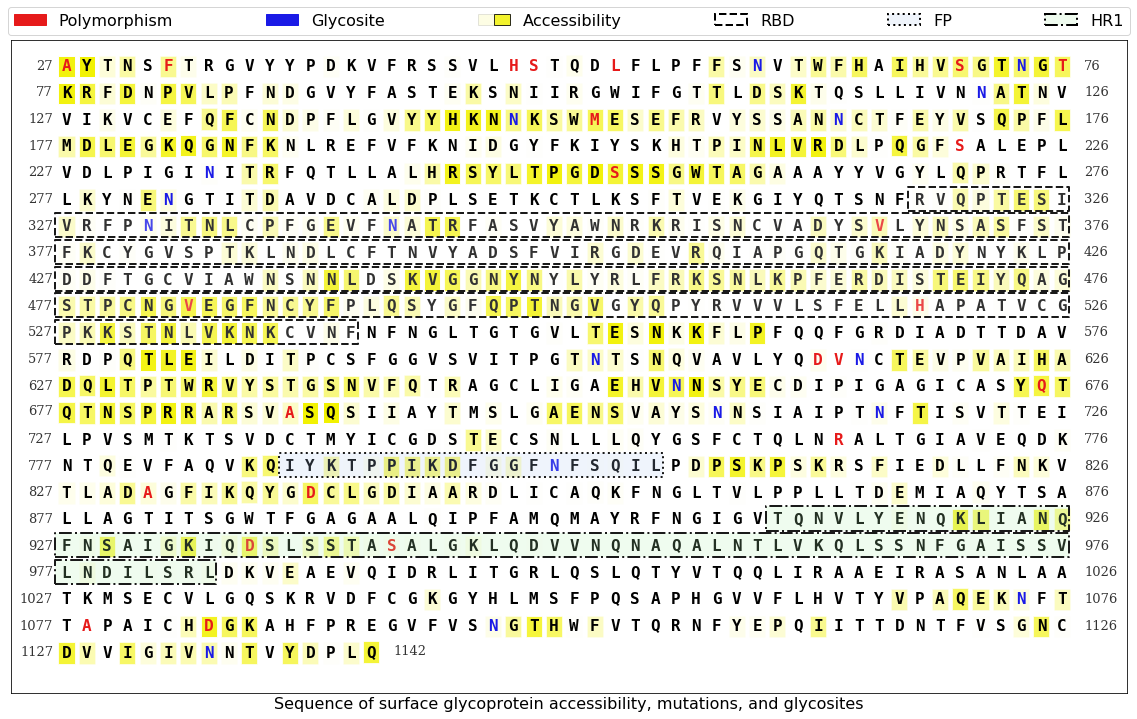

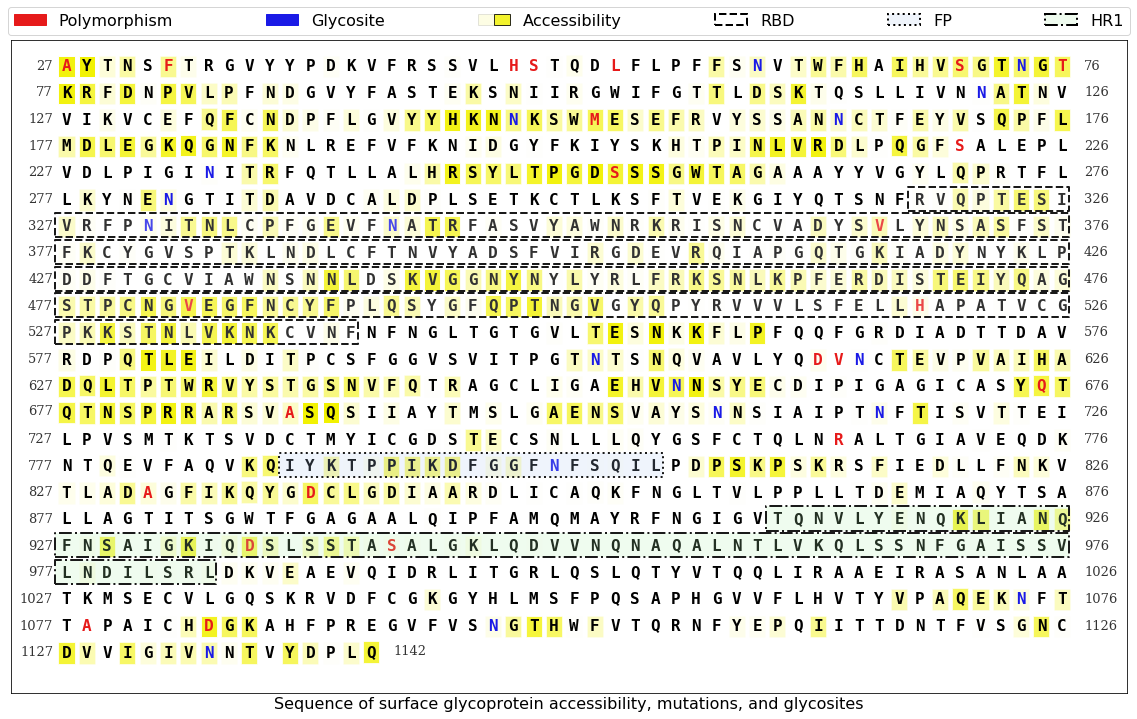

In [24]:
plot_spike_sequence(
    filename="spike-26-1142-glycosylated-accessibility-mutations-glycosites.png",
    xlabel="Sequence of surface glycoprotein accessibility, mutations, and glycosites",
    start=start, 
    end=end,
    fontsize=16,
    figsize=(20, 12),
    letters_per_line=50,
    x_padding_left=0.05,
    x_padding_right=0.04,
    y_padding_top=0.04,
    y_padding_bottom=0.02, 
    show_all_amino_acids=True)



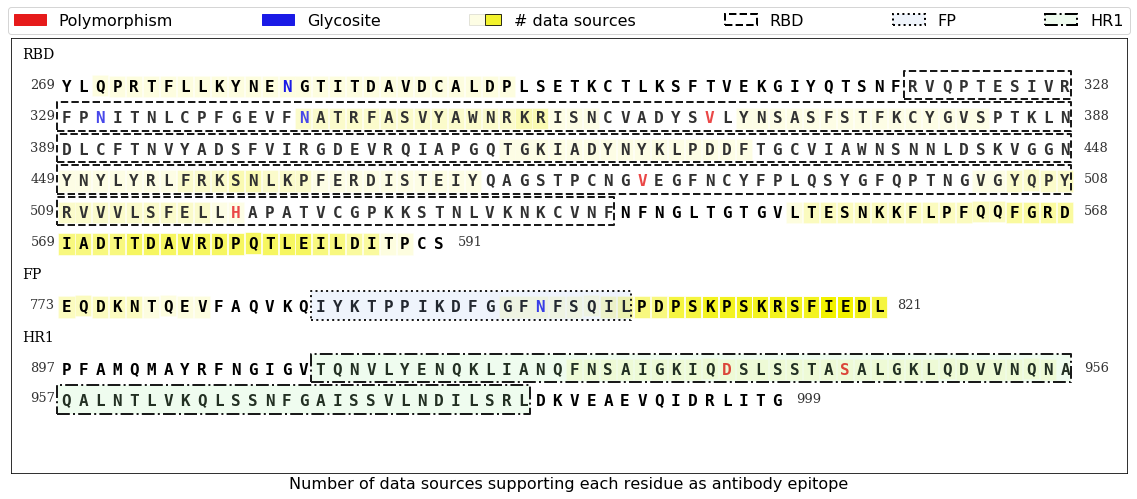

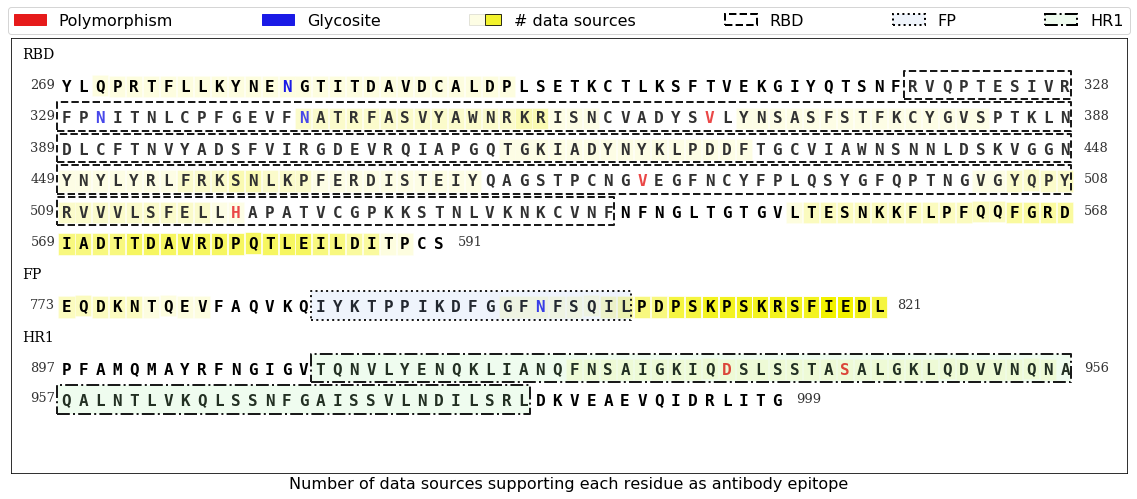

In [25]:
plot_spike_sequence(
    filename="spike-domains-bcell-epitopes-colored-by-number-of-sources.png",
    xlabel="Number of data sources supporting each residue as antibody epitope",
    start=start, 
    end=1273,
    fontsize=16,
    figsize=(20, 8),
    letters_per_line=60,
    x_padding_left=0.05,
    x_padding_right=0.04,
    y_padding_top=0.04,
    y_padding_bottom=0.02, 
    color_by_accessility=False,
    show_all_amino_acids=False)

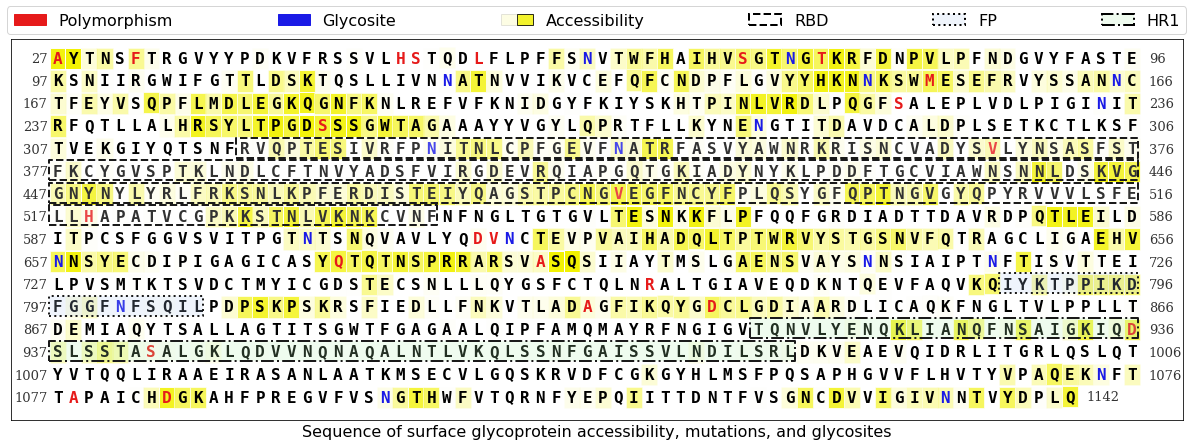

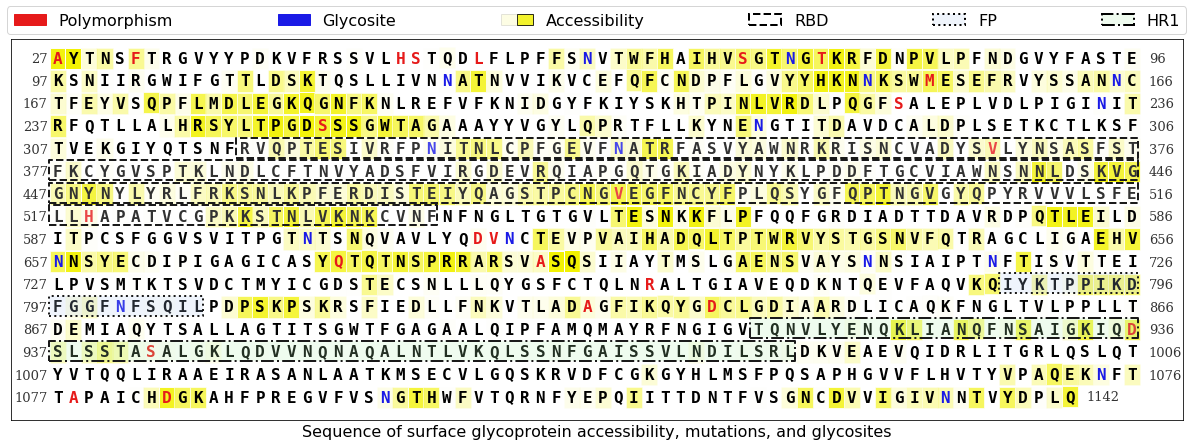

In [26]:
plot_spike_sequence(
    filename="full-spike-glycosylated-accessibility-mutations-glycosites-wide.png",
    xlabel="Sequence of surface glycoprotein accessibility, mutations, and glycosites",
    start=start, 
    end=end,
    fontsize=16,
    figsize=(21, 7),
    letters_per_line=70,
    x_padding_left=0.04,
    x_padding_right=0.03,
    y_padding_top=0.05,
    y_padding_bottom=0, 
    legend_y_coord=0.9,
    show_all_amino_acids=True)

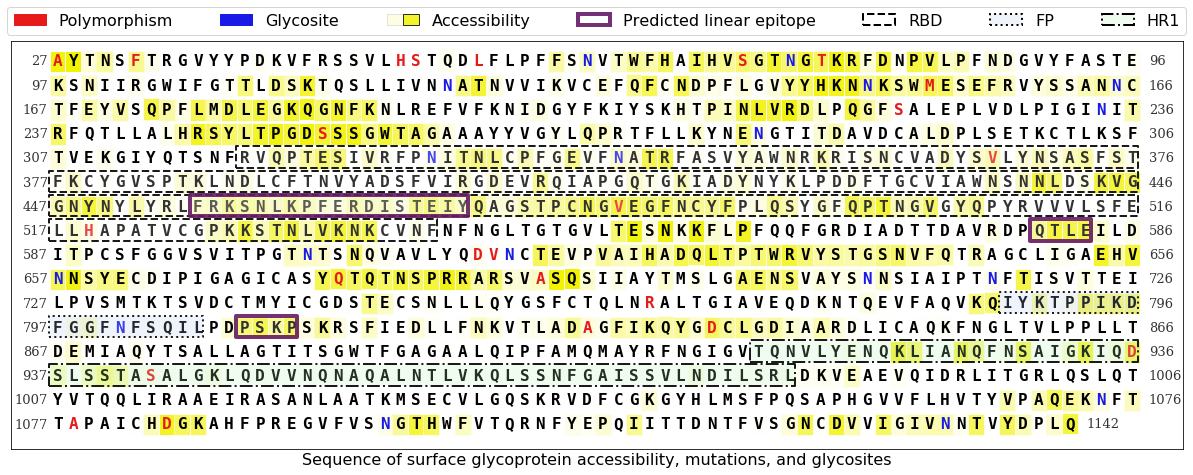

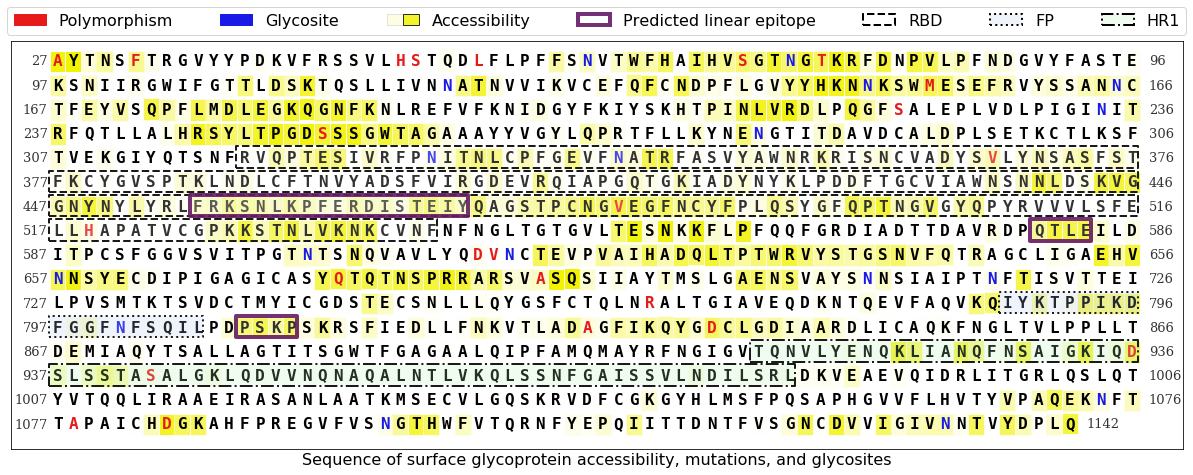

In [27]:
plot_spike_sequence(
    filename="full-spike-glycosylated-accessibility-mutations-glycosites-wide-predicted-epitopes.png",
    xlabel="Sequence of surface glycoprotein accessibility, mutations, and glycosites",
    start=start, 
    end=end,
    fontsize=16,
    figsize=(21, 7.5),
    letters_per_line=70,
    x_padding_left=0.04,
    x_padding_right=0.03,
    y_padding_top=0.05,
    y_padding_bottom=0, 
    legend_y_coord=0.9,
    show_all_amino_acids=True,
    highlight_epitopes=True)

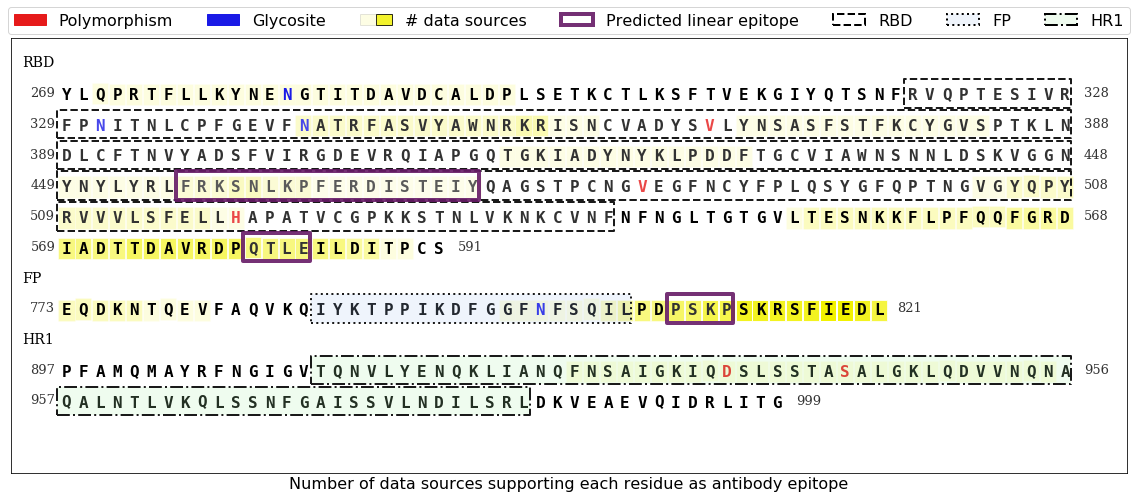

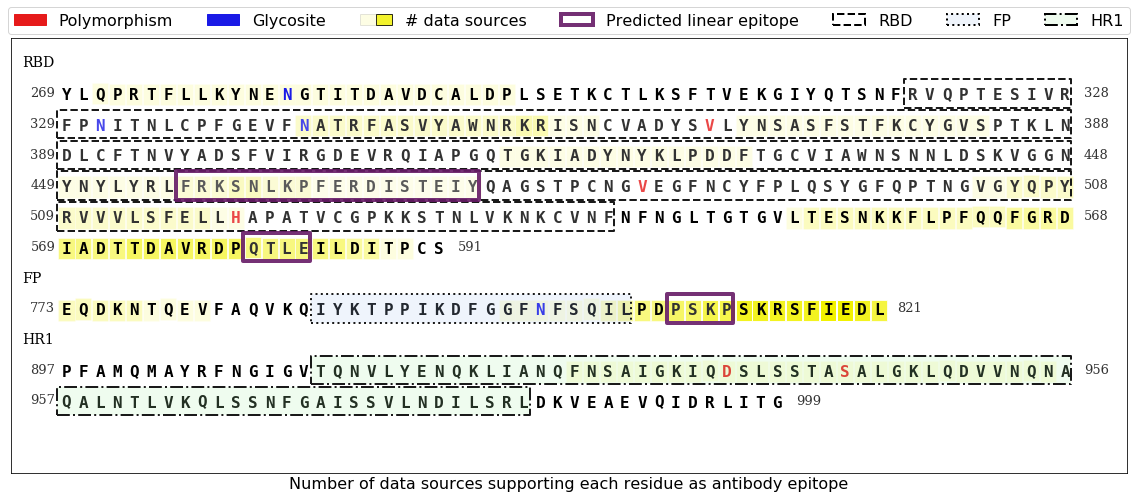

In [28]:
plot_spike_sequence(
    filename="spike-domains-bcell-epitopes-colored-by-number-of-sources-predicted-epitopes.png",
    xlabel="Number of data sources supporting each residue as antibody epitope",
    start=start, 
    end=None,
    fontsize=16,
    figsize=(20, 8),
    letters_per_line=60,
    x_padding_left=0.05,
    x_padding_right=0.04,
    y_padding_top=0.06,
    y_padding_bottom=0.02, 
    color_by_accessility=False,
    show_all_amino_acids=False,
    highlight_epitopes=True)

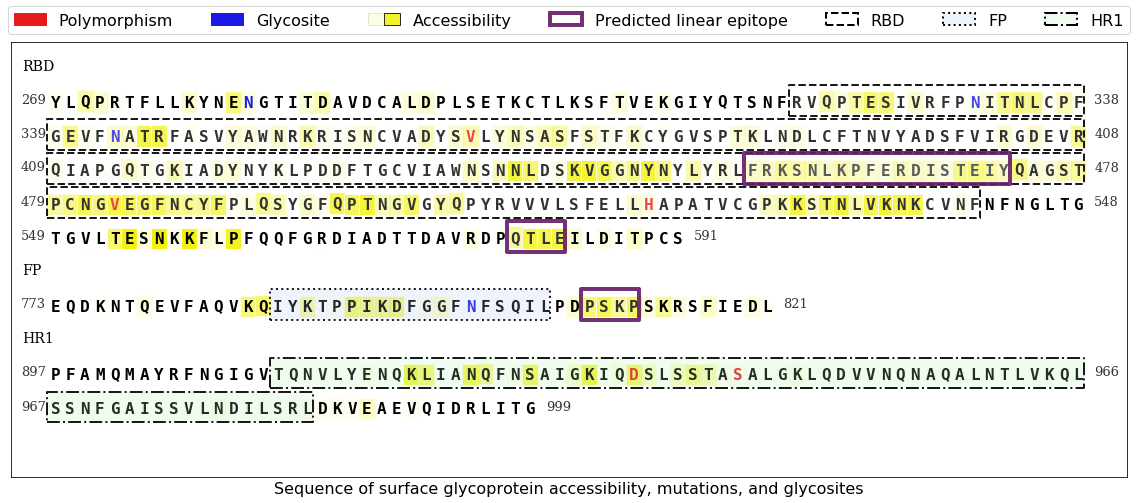

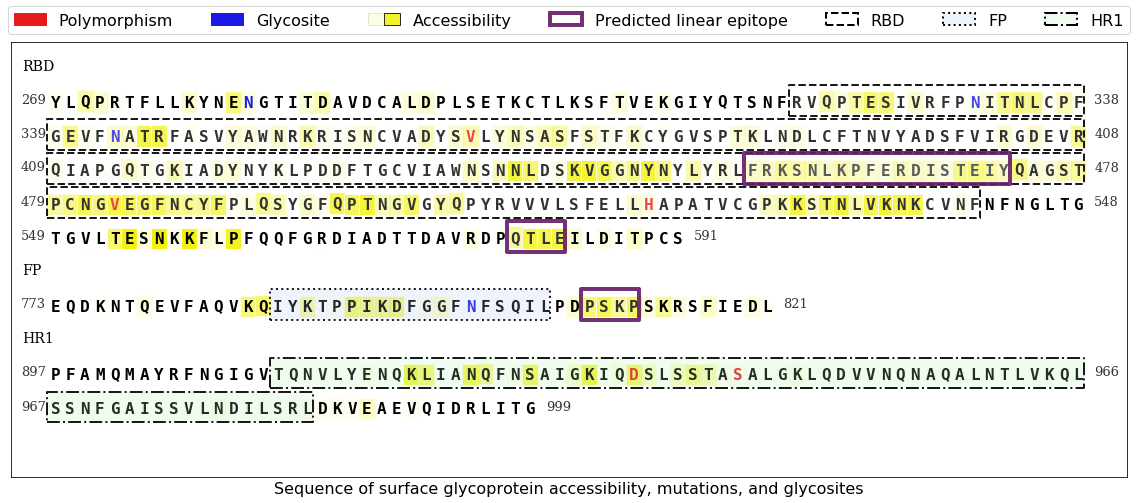

In [29]:
plot_spike_sequence(
    filename="spike-domains-glycosylated-accessibility-mutations-glycosites-predicted-epitopes.png",
    xlabel="Sequence of surface glycoprotein accessibility, mutations, and glycosites",
    start=start, 
    end=end,
    fontsize=16,
    figsize=(20, 8),
    letters_per_line=70,
    x_padding_left=0.04,
    x_padding_right=0.03,
    y_padding_top=0.06,
    y_padding_bottom=0, 
    legend_y_coord=0.9,
    show_all_amino_acids=False,
    highlight_epitopes=True)

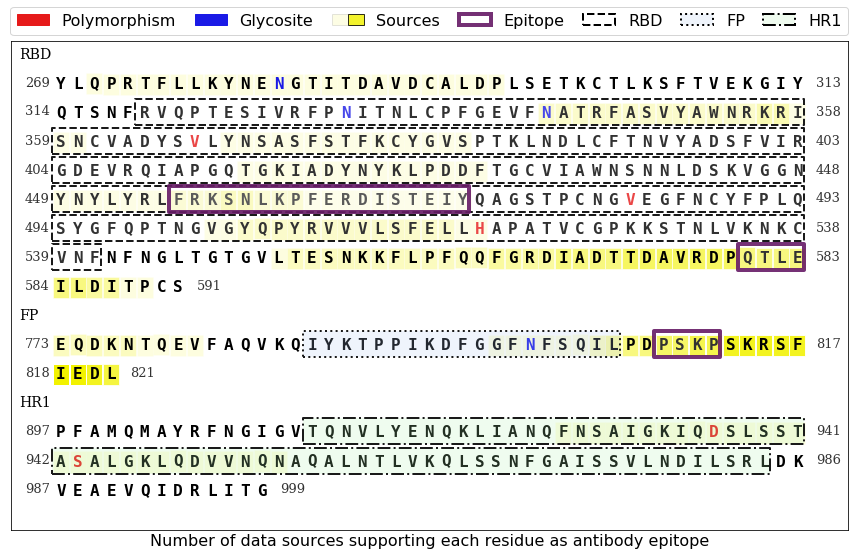

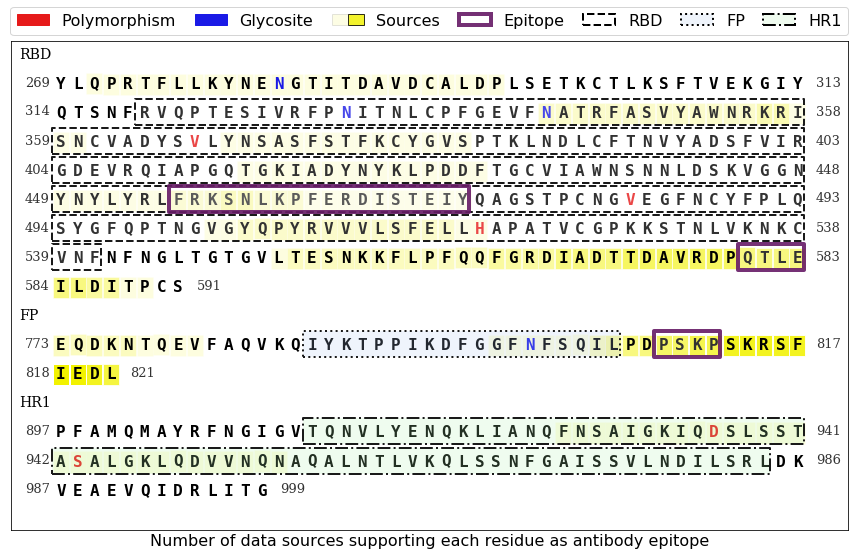

In [30]:
plot_spike_sequence(
    filename="spike-domains-bcell-epitopes-colored-by-number-of-sources-predicted-epitopes-tall.png",
    xlabel="Number of data sources supporting each residue as antibody epitope",
    start=start, 
    end=None,
    fontsize=16,
    figsize=(15, 9),
    letters_per_line=45,
    x_padding_left=0.06,
    x_padding_right=0.04,
    y_padding_top=0.03,
    y_padding_bottom=0.02, 
    color_by_accessility=False,
    show_all_amino_acids=False,
    highlight_epitopes=True,
    number_data_sources_label="Sources",
    linear_epitope_label="Epitope")